# Exercise 5: Classification Tree

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import random
import matplotlib.pyplot as plt # only need pyplot
sb.set() # set the default Seaborn style for graphics

### Importing Dataset

In [6]:
data = pd.read_csv("train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Problem 1: Predicting CentralAir using SalePrice

### 1a: Creating appropriate datasets for Train and Test in 80:20 ratio
Predictor: SalePrice

Response: CentralAir

In [8]:
centralAir = pd.DataFrame(data["CentralAir"])
salePrice = pd.DataFrame(data["SalePrice"])

In [9]:
from sklearn.model_selection import train_test_split

# Split the Legendary-Total Dataset into Train and Test
centralAir_train, centralAir_test, salePrice_train, salePrice_test = train_test_split(centralAir, salePrice, test_size = 0.20, random_state = 1)

# Check sample sizes
print("Train Set :", centralAir_train.shape, salePrice_train.shape)
print("Test Set  :", centralAir_test.shape, salePrice_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


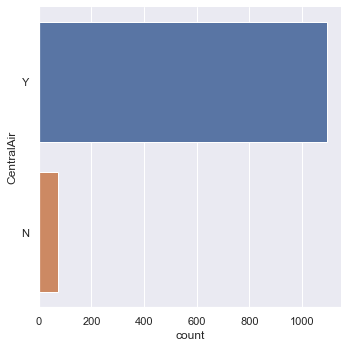

In [10]:
# Count Plot for CentralAir Train
sb.catplot(y = "CentralAir", data = centralAir_train, kind = "count")

<AxesSubplot:>

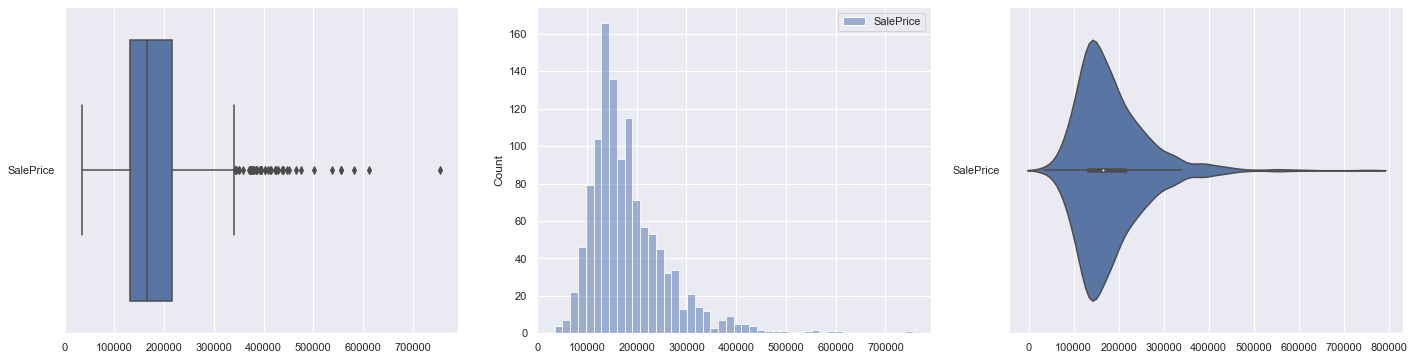

In [11]:
# Plot the distributions of salePrice Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = salePrice_train, orient = "h", ax = axes[0])
sb.histplot(data = salePrice_train, ax = axes[1])
sb.violinplot(data = salePrice_train, orient = "h", ax = axes[2])

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

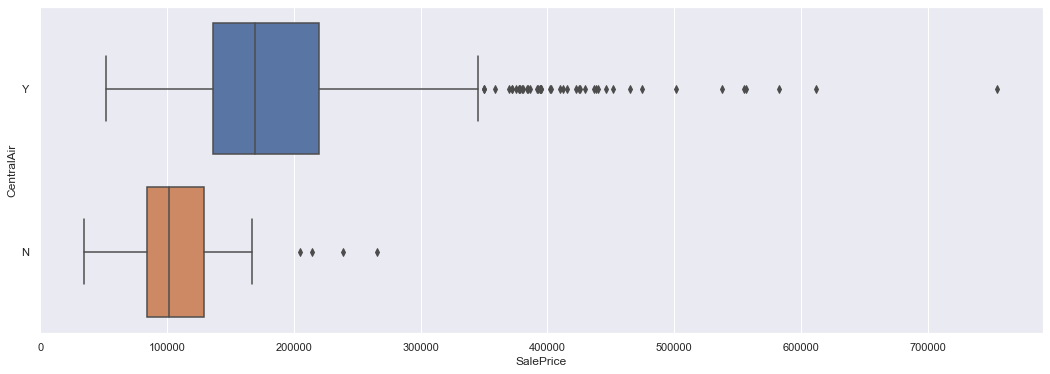

In [13]:
# Create a joint dataframe by concatenating SalePrice and CentralAir
trainDF = pd.concat([salePrice_train, centralAir_train], axis = 1).reindex(salePrice_train.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")

/opt/homebrew/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

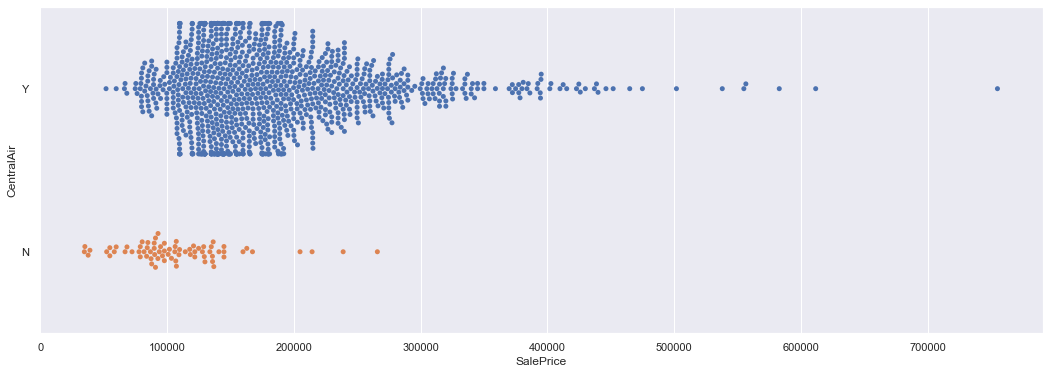

In [14]:
# Joint Swarmplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")

### 1a: Fit two Classification Tree Models (of Max Depth 2 & Max Depth 4) to predict CentralAir using SalePrice

In [15]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

In [16]:
# Create a Decision Tree Classifier object
decisionTree2 = DecisionTreeClassifier(max_depth=2)
# Train the Decision Tree Classifier model
decisionTree2.fit(salePrice_train, centralAir_train)

DecisionTreeClassifier(max_depth=2)

In [17]:
# Create a Decision Tree Classifier object
decisionTree4 = DecisionTreeClassifier(max_depth=4)
# Train the Decision Tree Classifier model
decisionTree4.fit(salePrice_train, centralAir_train)

DecisionTreeClassifier(max_depth=4)

### 1a: Printing Trees

[Text(0.5, 0.8333333333333334, 'Sale Price <= 107700.0\ngini = 0.119\nsamples = 1168\nvalue = [74, 1094]\nclass = CentralAir'),
 Text(0.25, 0.5, 'Sale Price <= 59250.0\ngini = 0.476\nsamples = 113\nvalue = [44, 69]\nclass = CentralAir'),
 Text(0.125, 0.16666666666666666, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = No CentralAir'),
 Text(0.375, 0.16666666666666666, 'gini = 0.453\nsamples = 104\nvalue = [36, 68]\nclass = CentralAir'),
 Text(0.75, 0.5, 'Sale Price <= 137225.0\ngini = 0.055\nsamples = 1055\nvalue = [30, 1025]\nclass = CentralAir'),
 Text(0.625, 0.16666666666666666, 'gini = 0.149\nsamples = 234\nvalue = [19, 215]\nclass = CentralAir'),
 Text(0.875, 0.16666666666666666, 'gini = 0.026\nsamples = 821\nvalue = [11, 810]\nclass = CentralAir')]

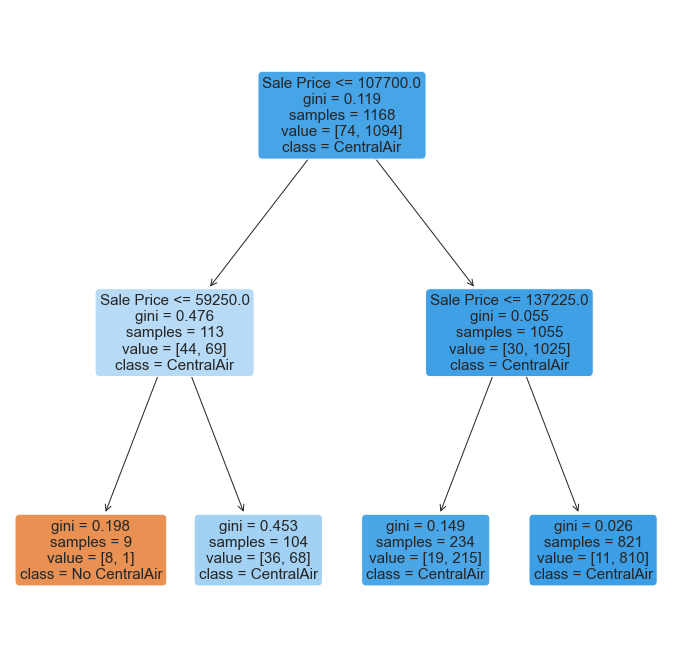

In [18]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(decisionTree2, filled=True, rounded=True, 
          feature_names=["Sale Price"], 
          class_names=["No CentralAir","CentralAir"])

[Text(0.45689655172413796, 0.9, 'Sale Price <= 107700.0\ngini = 0.119\nsamples = 1168\nvalue = [74, 1094]\nclass = CentralAir'),
 Text(0.1896551724137931, 0.7, 'Sale Price <= 59250.0\ngini = 0.476\nsamples = 113\nvalue = [44, 69]\nclass = CentralAir'),
 Text(0.06896551724137931, 0.5, 'Sale Price <= 45650.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = No CentralAir'),
 Text(0.034482758620689655, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No CentralAir'),
 Text(0.10344827586206896, 0.3, 'Sale Price <= 52250.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = No CentralAir'),
 Text(0.06896551724137931, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = CentralAir'),
 Text(0.13793103448275862, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No CentralAir'),
 Text(0.3103448275862069, 0.5, 'Sale Price <= 106075.0\ngini = 0.453\nsamples = 104\nvalue = [36, 68]\nclass = CentralAir'),
 Text(0.2413793103448276, 0.3, 'Sale Price <= 98150.0\ngini = 0.437\nsamples = 9

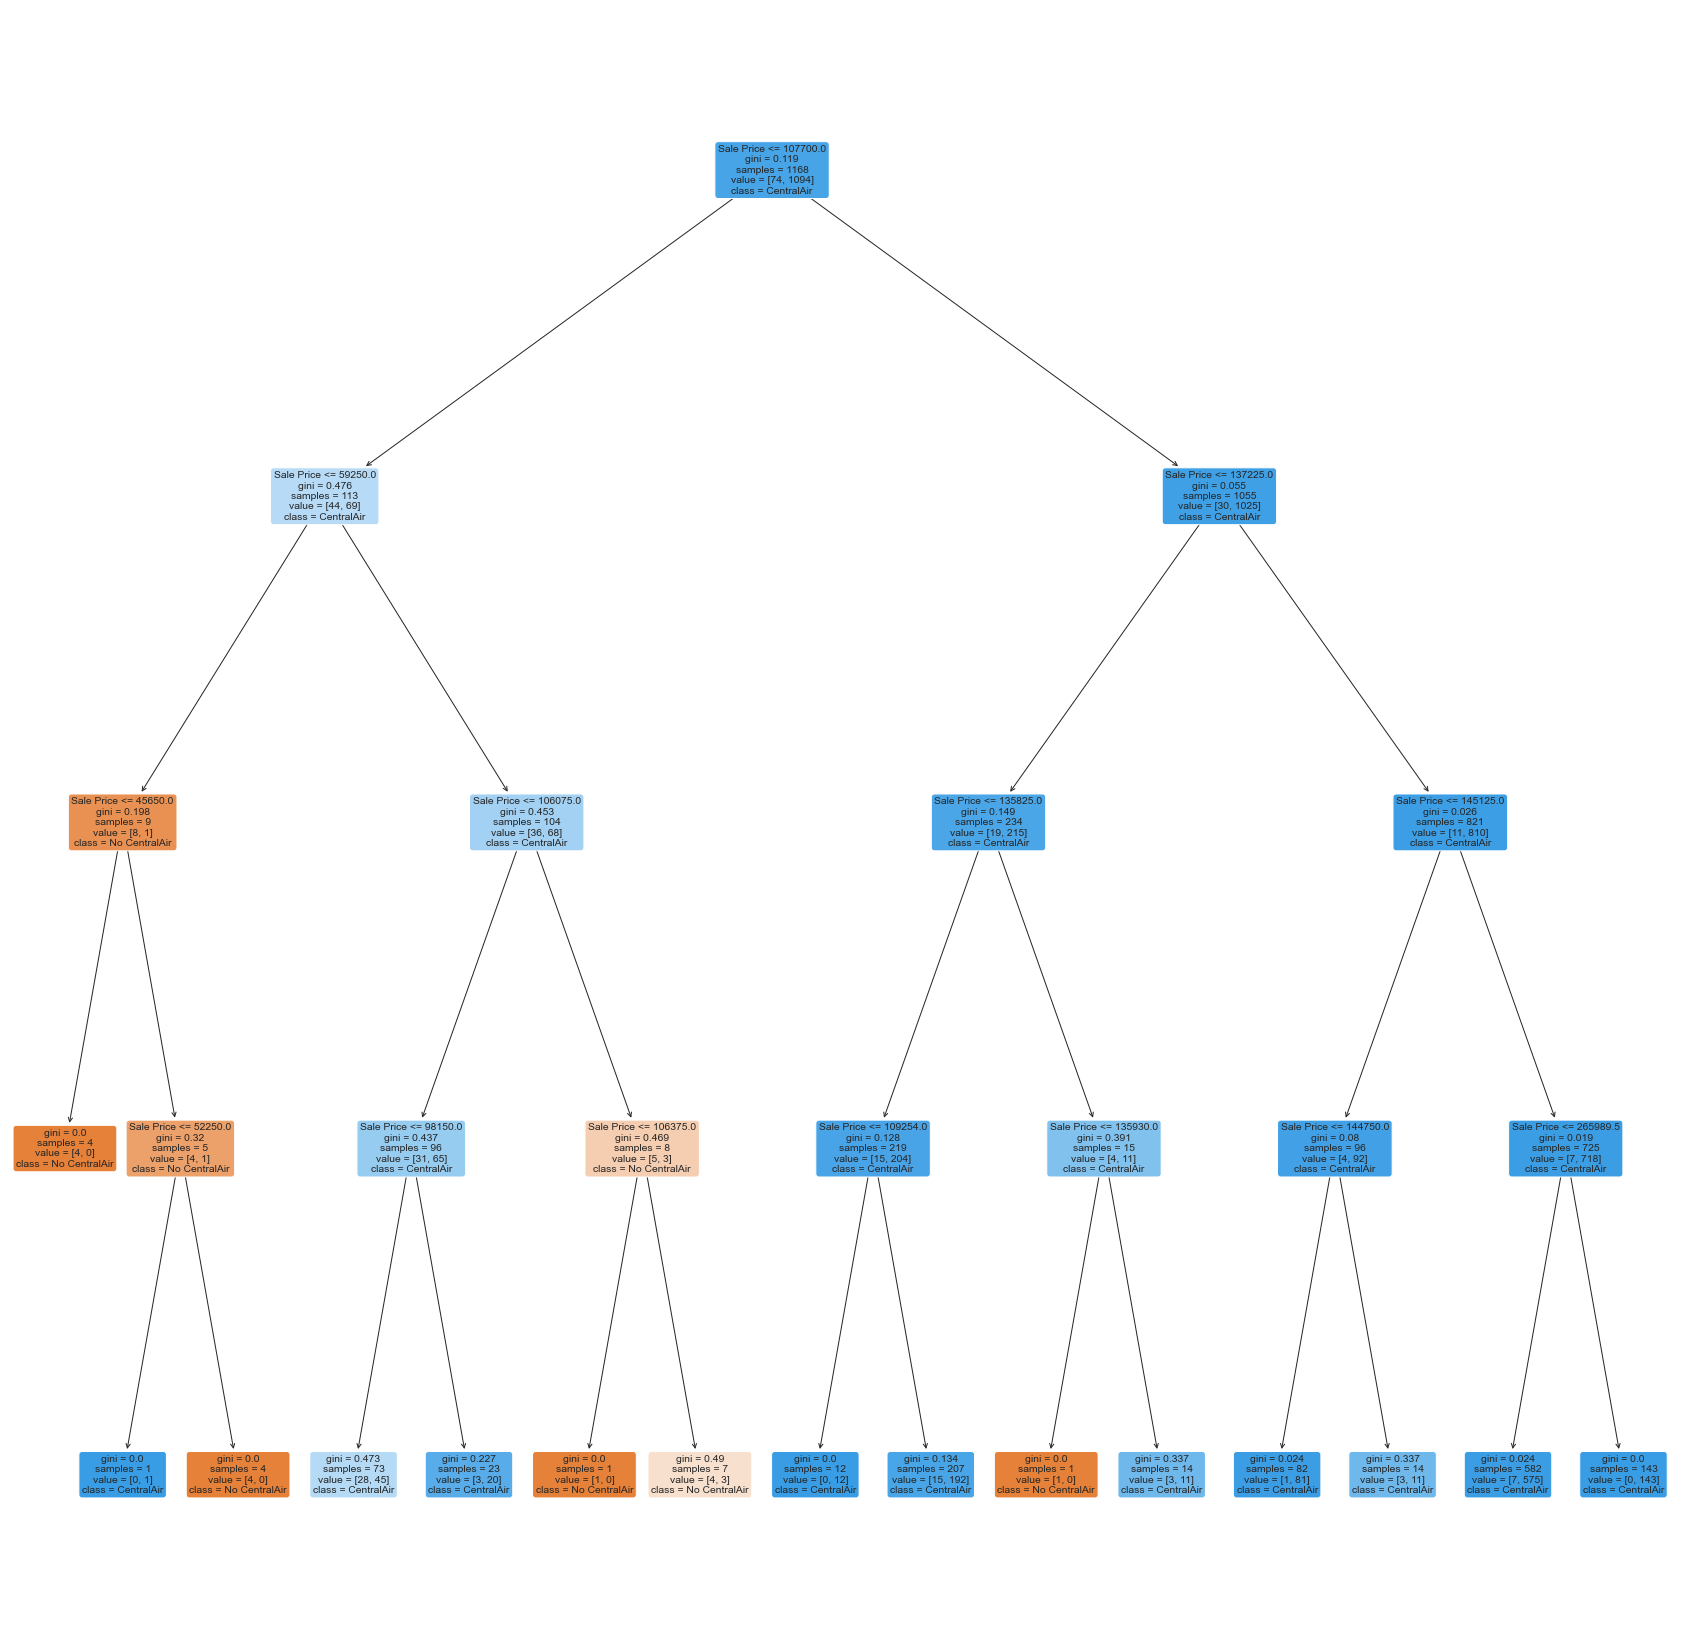

In [19]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,30))
plot_tree(decisionTree4, filled=True, rounded=True, 
          feature_names=["Sale Price"], 
          class_names=["No CentralAir","CentralAir"])

### 1b: Print Confusion Matrices on Train & Test Sets

#### Max Depth 2 Tree Model

In [33]:
from sklearn.metrics import confusion_matrix

# Predict CentralAir values corresponding to SalePrice
centralAir_train_pred = decisionTree2.predict(salePrice_train)
centralAir_test_pred = decisionTree2.predict(salePrice_test)

# Classification Accuracy / Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", decisionTree2.score(salePrice_train, centralAir_train))
print()

# Classification Accuracy / Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", decisionTree2.score(salePrice_test, centralAir_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9426369863013698

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.934931506849315



<AxesSubplot:>

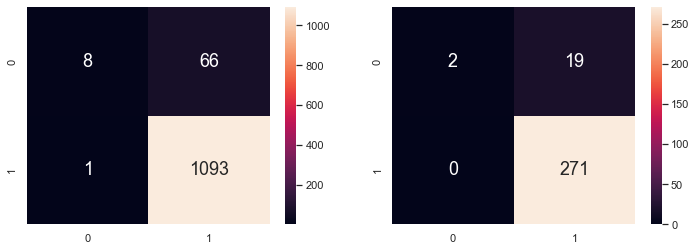

In [34]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(centralAir_train, centralAir_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(centralAir_test, centralAir_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [35]:
print("Train Dataset")
TN, FP, FN, TP = confusion_matrix(centralAir_train, centralAir_train_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Train Dataset
True Postive is:   0.9990859232175503
False Postive is:  0.8918918918918919


In [36]:
print("Test Dataset")
TN, FP, FN, TP = confusion_matrix(centralAir_test, centralAir_test_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Test Dataset
True Postive is:   1.0
False Postive is:  0.9047619047619048


#### Max Depth 4 Tree Model

In [37]:
from sklearn.metrics import confusion_matrix

# Predict CentralAir values corresponding to SalePrice
centralAir_train_pred = decisionTree4.predict(salePrice_train)
centralAir_test_pred = decisionTree4.predict(salePrice_test)

# Classification Accuracy / Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", decisionTree4.score(salePrice_train, centralAir_train))
print()

# Classification Accuracy / Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", decisionTree4.score(salePrice_test, centralAir_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9460616438356164

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.928082191780822



<AxesSubplot:>

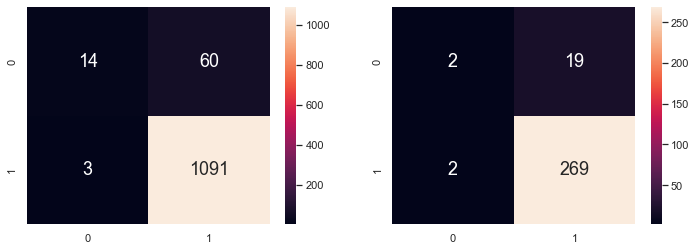

In [38]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(centralAir_train, centralAir_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(centralAir_test, centralAir_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [39]:
print("Train Dataset")
TN, FP, FN, TP = confusion_matrix(centralAir_train, centralAir_train_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Train Dataset
True Postive is:   0.9972577696526508
False Postive is:  0.8108108108108109


In [40]:
print("Test Dataset")
TN, FP, FN, TP = confusion_matrix(centralAir_test, centralAir_test_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Test Dataset
True Postive is:   0.992619926199262
False Postive is:  0.9047619047619048


Both models are very comparable with similar classification accuracies. But it appears that Depth 4 Tree Model yields slightly better results, as the FPR is lower.

## Problem 2: Predicting CentralAir using Other Variables

In [24]:
indexes = [i for i in range(len(data)-1)]
train_index = random.sample(indexes, int(80/100*len(data)))
test_index = [i for i in indexes if i not in train_index]

#### OverallQual (Predictor),  CentralAir (Reponse)

In [41]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Recall the air-qual Dataset
overallQual = pd.DataFrame(data['OverallQual']) # Predictor
centralAir = pd.DataFrame(data['CentralAir'])   # Response

# Split the air-qual Dataset into Train and Test
centralAir_train, centralAir_test, overallQual_train, overallQual_test = train_test_split(centralAir, overallQual, test_size = 0.20, random_state = 1)

# Check the sample sizes
print("Train Set :", centralAir_train.shape, overallQual_train.shape)
print("Test Set  :", centralAir_test.shape, overallQual_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


In [42]:
# Decision Tree using Train Data
decTree4 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
decTree4.fit(overallQual_train, centralAir_train) # train the decision tree model

# Predict CentralAir values corresponding to Qual
train_pred = decTree4.predict(overallQual_train)
test_pred = decTree4.predict(overallQual_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", decTree4.score(overallQual_train, centralAir_train))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", decTree4.score(overallQual_test, centralAir_test))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9392123287671232
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.934931506849315


<AxesSubplot:>

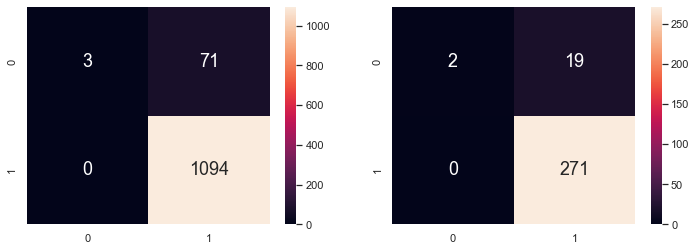

In [43]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(centralAir_train, train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(centralAir_test, test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [44]:
print("Train Dataset")
TN, FP, FN, TP = confusion_matrix(centralAir_train, train_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Train Dataset
True Postive is:   1.0
False Postive is:  0.9594594594594594


In [45]:
print("Test Dataset")
TN, FP, FN, TP = confusion_matrix(centralAir_test, test_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Test Dataset
True Postive is:   1.0
False Postive is:  0.9047619047619048


#### YearBuilt (Predictor),  CentralAir (Reponse)

In [46]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Recall the air-year Dataset
yearBuilt = pd.DataFrame(data['YearBuilt'])   # Predictor
centralAir = pd.DataFrame(data['CentralAir']) # Response

# Split the air-year Dataset into Train and Test
centralAir_train, centralAir_test, yearBuilt_train, yearBuilt_test = train_test_split(centralAir, yearBuilt, test_size = 0.20, random_state = 1)

# Check the sample sizes
print("Train Set :", centralAir_train.shape, yearBuilt_train.shape)
print("Test Set  :", centralAir_test.shape, yearBuilt_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


In [48]:
# Decision Tree using Train Data
decTree4 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
decTree4.fit(yearBuilt_train, centralAir_train)                    # train the decision tree model

# Predict CentralAir values corresponding to Year
train_pred = decTree4.predict(yearBuilt_train)
test_pred = decTree4.predict(yearBuilt_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", decTree4.score(yearBuilt_train, centralAir_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", decTree4.score(yearBuilt_test, centralAir_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9460616438356164

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8972602739726028



<AxesSubplot:>

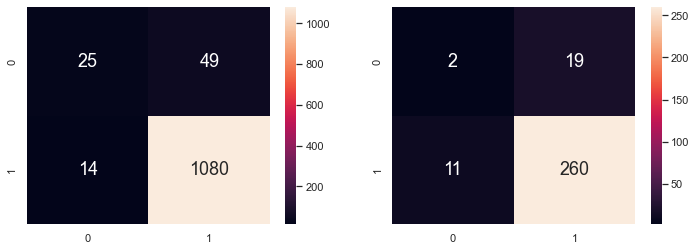

In [49]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(centralAir_train, train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(centralAir_test, test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [50]:
print("Train Dataset")
TN, FP, FN, TP = confusion_matrix(centralAir_train, train_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Train Dataset
True Postive is:   0.9872029250457038
False Postive is:  0.6621621621621622


In [51]:
print("Test Dataset")
TN, FP, FN, TP = confusion_matrix(centralAir_test, test_pred).ravel()
(TN, FP, FN, TP)
print("True Postive is:  ", TP/(TP+FN))
print("False Postive is: ", FP/(TN+FP))

Test Dataset
True Postive is:   0.959409594095941
False Postive is:  0.9047619047619048


Both datasets are very comparable. But it appears that OverallQual yields slightly better results over YearBuilt, as the TP values is better.

## Problem 3: Understanding the Misclassified Samples

In [52]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

salePrice = pd.DataFrame(data['SalePrice'])  # Predictor
centralAir = pd.DataFrame(data['CentralAir'])   # Response

salePrice_train, salePrice_test, centralAir_train, centralAir_test = train_test_split(salePrice, centralAir, test_size = 0.20, random_state = 1)

print("Train Set :", centralAir_train.shape, salePrice_train.shape)
print("Test Set  :", centralAir_test.shape, salePrice_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


In [54]:
# Decision Tree using Train Data
decTree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
decTree.fit(salePrice_train, centralAir_train)   # train the decision tree model

# Predict Aircon values corresponding to Sale Price
train_pred = decTree.predict(salePrice_train)
test_pred = decTree.predict(salePrice_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", decTree.score(salePrice_train, centralAir_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", decTree.score(salePrice_test, centralAir_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9460616438356164

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.928082191780822



<AxesSubplot:>

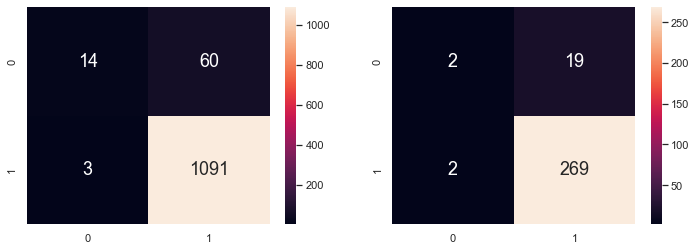

In [59]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(centralAir_train, train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(centralAir_test, test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [60]:
f = plt.figure(figsize=(200,200))
plot_tree(decTree, filled=True, rounded=True, 
          feature_names=["Sale Price"], 
          class_names=["No CentralAir","CentralAir"])

[Text(0.45689655172413796, 0.9, 'Sale Price <= 107700.0\ngini = 0.119\nsamples = 1168\nvalue = [74, 1094]\nclass = CentralAir'),
 Text(0.1896551724137931, 0.7, 'Sale Price <= 59250.0\ngini = 0.476\nsamples = 113\nvalue = [44, 69]\nclass = CentralAir'),
 Text(0.06896551724137931, 0.5, 'Sale Price <= 45650.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = No CentralAir'),
 Text(0.034482758620689655, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No CentralAir'),
 Text(0.10344827586206896, 0.3, 'Sale Price <= 52250.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = No CentralAir'),
 Text(0.06896551724137931, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = CentralAir'),
 Text(0.13793103448275862, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No CentralAir'),
 Text(0.3103448275862069, 0.5, 'Sale Price <= 106075.0\ngini = 0.453\nsamples = 104\nvalue = [36, 68]\nclass = CentralAir'),
 Text(0.2413793103448276, 0.3, 'Sale Price <= 98150.0\ngini = 0.437\nsamples = 9

In [64]:
combined = pd.concat([salePrice_train, centralAir_train], axis=1).reindex(centralAir_train.index)
# edited = combined[(combined.SalePrice <= 98150) & (combined.SalePrice > 106375)]
edited = combined.drop(combined[combined.SalePrice > 106375].index)
edited

,SalePrice,CentralAir
520,106250,N
711,102776,Y
1325,55000,N
671,103600,N
935,79900,Y
...,...,...
1001,86000,Y
398,67000,Y
749,98000,N
235,89500,Y


## Question 3b

False positives are rows with CentralAir as N because it is falsely declared as Y

In [63]:
edited[edited.CentralAir == "N"]

,SalePrice,CentralAir
821,93000,N
620,67000,N
1062,90000,N
242,79000,N
1376,91000,N
329,78000,N
125,84500,N
1100,60000,N
1035,84000,N
676,87000,N
